# Data science tutorials  
### Chapter8: Machine learning - Regression

<img style="float: right;" src="img/logo.png" width="150">

<div style="text-align: right"> Initial issue : 2024.09.18 </div>
<div style="text-align: right"> last update : 2024.09.18 </div>

### Objectives  
- 지도학습 중에 회귀(Regression) 문제를 이해한다.  
- 사이킷런(Scikit-learn)을 사용하여 회귀 모델을 학습시킨다.

### 1. Boston housing 문제
---
보스턴 지역의 주택정보 데이터를 바탕으로 주택 가격을 예측하는 모델 만들기

<img src="img/ch09/01_boston.jpg" width="800">

#### 1.1 라이브러리 import

In [1]:
import numpy as np #numpy
import pandas as pd #pandas

from sklearn.model_selection import train_test_split

#### 1.2 데이터 읽어오기 및 기본정보 확인

데이터셋 읽어오기

In [2]:
boston = pd.read_csv('data/housing.csv')

5개 샘플만 확인하기

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


컬럼 정보  
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10,000usd
- PTRATIO : pupil-teacher ratio by town
- B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in 1000usd's

타겟 컬럼은 `MEDV`이다.  
타겟의 분포를 확인해본다.

<Axes: >

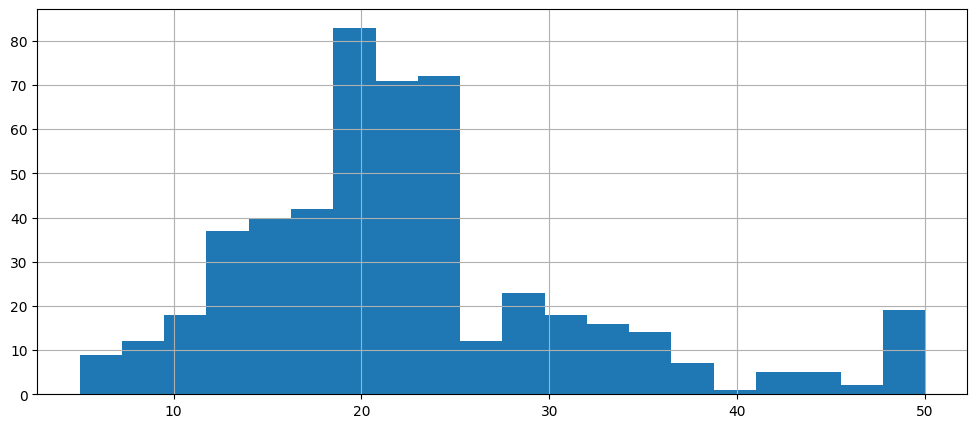

In [4]:
boston['MEDV'].hist(figsize=(12, 5), bins=20)

데이터 모양을 살펴본다.

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### 1.3 데이터 전처리 및 학습/ 시험 데이터 나누기

데이터 셋을 입력(피처)과 출력(타겟)으로 나눈다.

In [6]:
X = boston.iloc[:, 0:13]
y = boston.iloc[:, 13]

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

학습 데이터와 시험 데이터로 분리한다.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state = 7,test_size = 0.3)

#### 1.4 모델학습  
- 선형회귀(Linear regression) 모델을 사용한다.   
- 선형회귀 참고자료  
    - [참고1](https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html)
    - [참고2](https://hleecaster.com/ml-linear-regression-concept/)

선형회귀 모델 라이브러리 import

In [10]:
from sklearn.linear_model import LinearRegression

모델 생성 및 학습

In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### 1.5 모델 시험, 평가

In [12]:
linreg.score(X_train, y_train)

0.7613288901253087

In [13]:
linreg.score(X_train, y_train)

0.7613288901253087

회귀에서 score는 R^2 연산식을 사용한다.  
- 참고 : https://engineer-mole.tistory.com/240

### 2. Boston housing 문제 2   
---
앙상블 모델을 사용하여 성능을 개선해본다.  
- 앙상블(ensemble) : 다수의  결정트리를 사용하여 예측성능을 향상시키는 방법  
- 대표적인 방법으로 배깅(bagging)과 부스팅(boosting)이 있음  
    - [참고](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting)

#### 2.1 랜덤 포레스트(Random forest) 모델 : 배깅 방식

<img src="img/ch09/02_rf.jpg" width="800">

랜덤 포레스트 : 다수의 결정트리를 생성하고 학습시켜, 각 결정트리가 출력한 결과를 참고(voting)하여 정확도를 향상시키는 모델링 기법   
- [참고1](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sbd38&logNo=221373436623)
- [참고2](https://hleecaster.com/ml-random-forest-concept/)

1) 데이터 읽기

In [14]:
boston = pd.read_csv('data/housing.csv')

2) 데이터 전처리 : 데이터 셋을 입력(피처)과 출력(타겟)으로 나눈다.

In [15]:
X = boston.iloc[:, 0:13]
y = boston.iloc[:, 13]

3) 학습/ 시험 데이터 나누기

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state = 7,test_size = 0.3)

**4) 랜덤 포레스트 모델로 학습하기**

In [17]:
from sklearn.ensemble import RandomForestRegressor # 회귀용 랜던포레스트 라이브러리

In [18]:
rfr = RandomForestRegressor(random_state=7) # 생성

In [19]:
rfr.fit(X_train, y_train) # 학습

RandomForestRegressor(random_state=7)

5) 성능 평가하기

In [20]:
rfr.score(X_train, y_train)

0.9745700251561583

In [21]:
rfr.score(X_test, y_test)

0.8097192970668423

In [22]:
# 앞에서 만든 선형회기 모델의 시험결과
linreg.score(X_train, y_train)

0.7613288901253087

- 랜덤 포레스트로 시험한 결과가 더 우수하다.

#### 2.2 그래디언트 부스팅(Gradient boosting) 모델 : 부스팅 방식

<img src="img/ch09/03_gbr.jpg" width="800">

그래디언트 부스팅 : 다수의 트리를 순차적으로 결합시켜 성능을 향상시키는 방법   
- [참고1](https://3months.tistory.com/368)
- [참고2](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost)

1) 데이터 읽기

In [23]:
boston = pd.read_csv('data/housing.csv')

2) 데이터 전처리 : 데이터 셋을 입력(피처)과 출력(타겟)으로 나눈다.

In [24]:
X = boston.iloc[:, 0:13]
y = boston.iloc[:, 13]

3) 학습/ 시험 데이터 나누기

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state = 7,test_size = 0.3)

**4) 그래디언트 부스팅 모델로 학습하기**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor # 회귀용 부스팅 라이브러리

In [27]:
gbr = GradientBoostingRegressor(random_state=7) # 모델 생성

In [28]:
gbr.fit(X_train, y_train) # 학습

GradientBoostingRegressor(random_state=7)

5) 성능 평가하기

In [29]:
gbr.score(X_train, y_train)

0.9823391224838423

In [30]:
gbr.score(X_test, y_test)

0.8691519886758896

### 참 고 : 특성 중요도(feature importance)
- 트리 기반 모델들은 특성 중요도 속성을 가지고 있음  
- 모델이 예측할 때 입력 변수의 중요도를 지표화 한 것임

In [31]:
feature_importance = pd.Series(gbr.feature_importances_)
feature_importance.index = X.columns

In [32]:
feature_importance

CRIM       0.041112
ZN         0.000367
INDUS      0.003488
CHAS       0.000962
NOX        0.024312
RM         0.521854
AGE        0.008729
DIS        0.059542
RAD        0.001422
TAX        0.013542
PTRATIO    0.020217
B          0.008154
LSTAT      0.296301
dtype: float64

바차트(bar chart)로 시각화 하기

<Axes: >

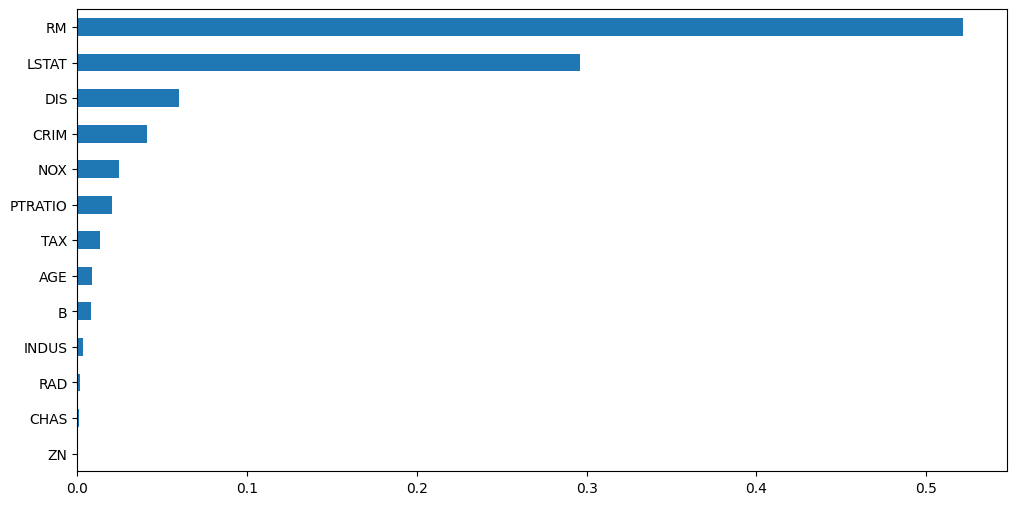

In [33]:
feature_importance.sort_values().plot(kind = 'barh', figsize = (12, 6))

### 하이퍼 파라미터(Hyper parameter) 튜닝  
- 지금까지 모델에서 제공하는 기본 파라미터를 사용해서 학습했음 
- 모델의 성능을 높이기 위해 파라미터를 조정해서 학습 할 수 있음

여기서는 그래디언트 부스팅 모델의 max_depth를 조정해서 최적의 성능을 내는 모델을 만들어본다.  
max_depth : 결정 트리의 가지(node) 깊이

In [34]:
scores = []
for depth in range(1, 13):
    gbr = GradientBoostingRegressor(max_depth = depth, random_state=7)
    gbr.fit(X_train, y_train)
    train_score = gbr.score(X_train, y_train)
    test_score = gbr.score(X_test, y_test)
    scores.append((train_score, test_score))

결과를 시각화 해본다.

<Axes: >

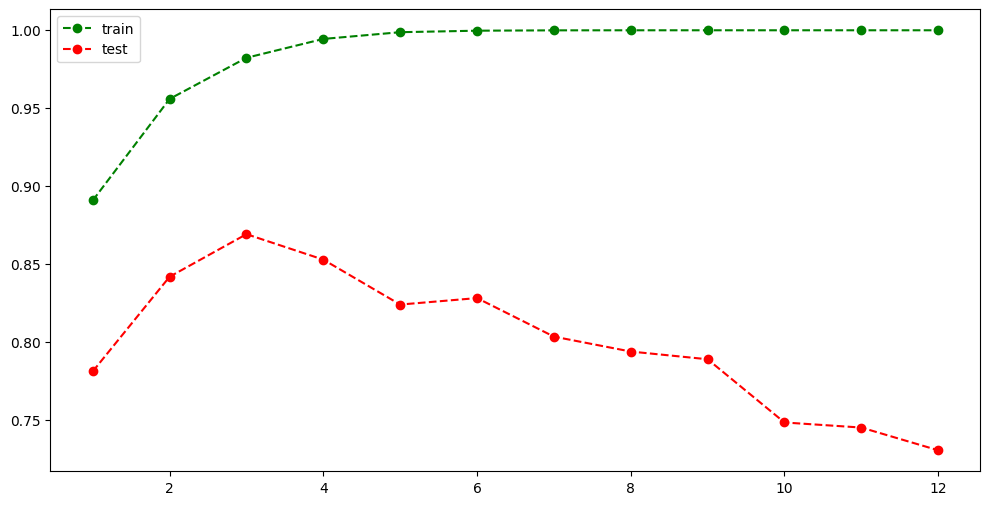

In [35]:
result = pd.DataFrame(scores, columns=['train', 'test'])
result.index = range(1, 13)
result.plot(style = ['go--', 'ro--'], figsize = (12, 6))

- 트리의 max_depth가 커질수록 학습 데이터에(train) 대한 성능은 좋아진다.  
- 그러나 시험 데이터에(test) 대한 성능은 max_depth=3 까지 상승하다가 떨어진다.  
- 모델의 성능은 학습 데이터, 시험 데이터에서 모두 우수해야 한다.  
- 따라서 max_depth=3으로 설정하는 것이 적정하다.